In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('cleaned_spotify.csv')

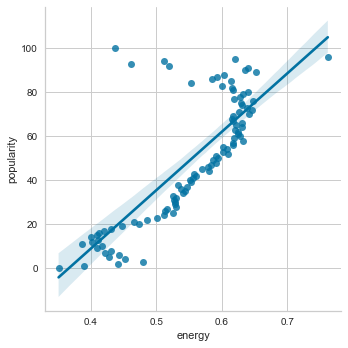

energy (0.7805997418563599, 2.636410381971405e-21)
energy SpearmanrResult(correlation=0.776766189137323, pvalue=5.4859070289562586e-21)


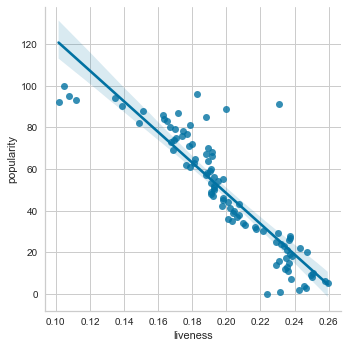

liveness (-0.8917057074812252, 8.097598950847149e-35)
liveness SpearmanrResult(correlation=-0.9177807955422093, pvalue=2.7490085914052344e-40)


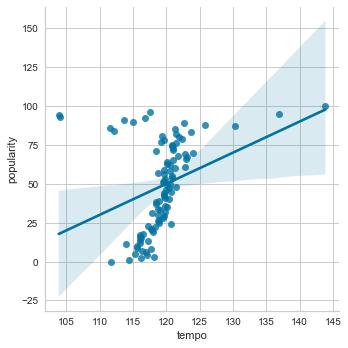

tempo (0.33217433852625045, 0.0008330243657513948)
tempo SpearmanrResult(correlation=0.5127288028613507, pvalue=6.755476532144912e-08)


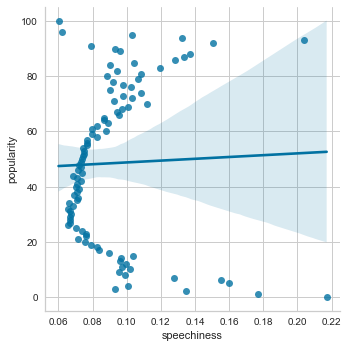

speechiness (0.0330474197635663, 0.7466623289334892)
speechiness SpearmanrResult(correlation=0.1577887012349457, pvalue=0.12072816597619343)


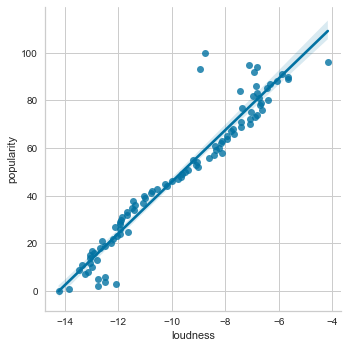

loudness (0.9600519583798233, 6.7240480229529e-55)
loudness SpearmanrResult(correlation=0.9601400072681368, pvalue=6.060813369734172e-55)


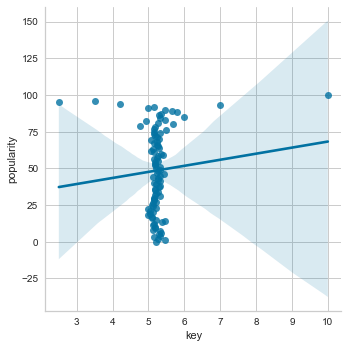

key (0.09322323715727349, 0.36123602671850924)
key SpearmanrResult(correlation=0.1266381253253995, pvalue=0.21402340961900934)


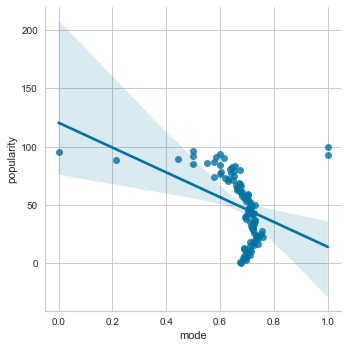

mode (-0.41930271109418954, 1.7280948020796675e-05)
mode SpearmanrResult(correlation=-0.6306121929669397, pvalue=3.4310799924087724e-12)


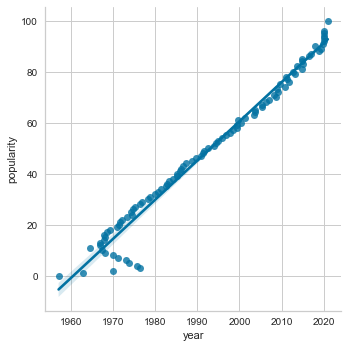

year (0.9863830868348622, 4.553079584807571e-77)
year SpearmanrResult(correlation=0.9845515294079837, pvalue=1.8646304339159484e-74)


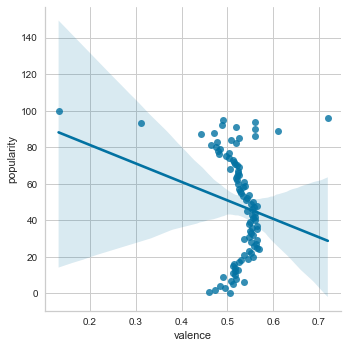

valence (-0.20410104662138356, 0.04381609361004196)
valence SpearmanrResult(correlation=-0.15712564313447963, pvalue=0.12231690442039311)


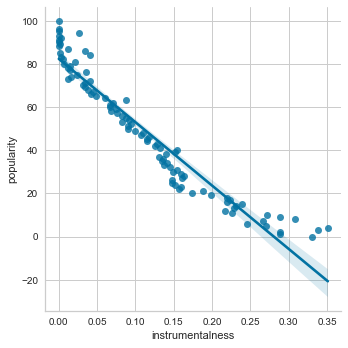

instrumentalness (-0.9616742272592931, 9.548621546598051e-56)
instrumentalness SpearmanrResult(correlation=-0.9868025935772621, pvalue=1.0237709875325077e-77)


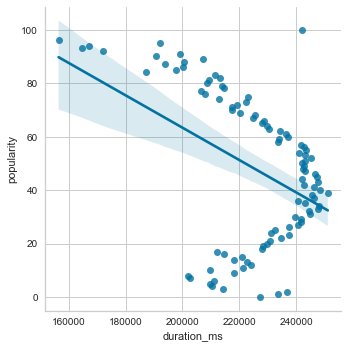

duration_ms (-0.43002481740071935, 9.908622694424922e-06)
duration_ms SpearmanrResult(correlation=-0.3416470618237923, pvalue=0.0005754096607789602)


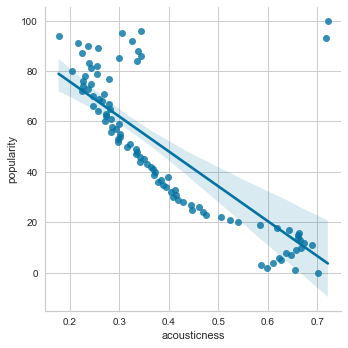

acousticness (-0.7530001074277655, 3.806574690713849e-19)
acousticness SpearmanrResult(correlation=-0.7880636790798793, pvalue=6.06303214224104e-22)


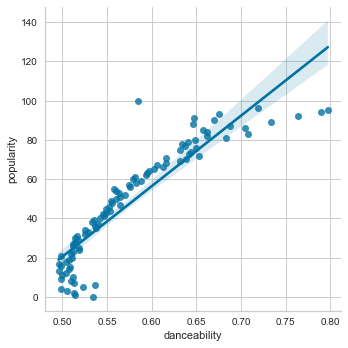

danceability (0.9054143542489625, 1.7020059846370843e-37)
danceability SpearmanrResult(correlation=0.9508061893923454, pvalue=1.183293815991194e-50)


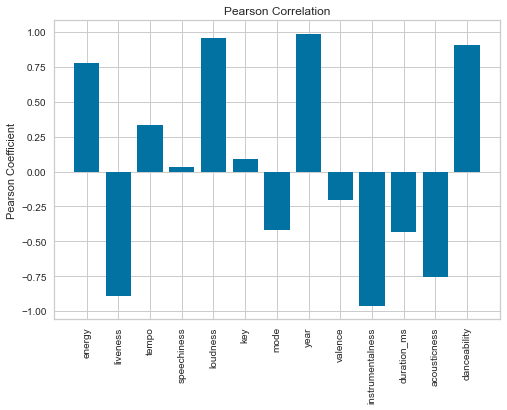

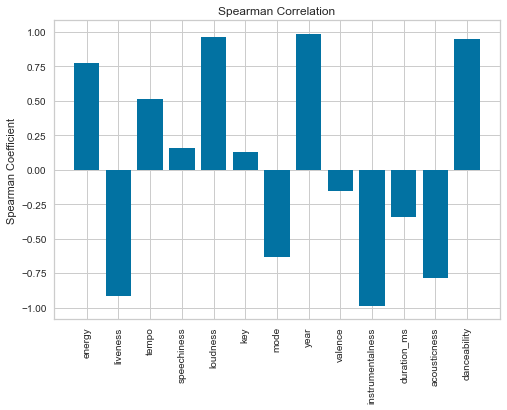

In [3]:
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
p = []
s =[]

l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        # df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        # sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired", order=2)
        plt.show()
        p1 = stats.pearsonr(df1[l[i]], df1['popularity'])
        print(l[i],p1)
        p.append(p1[0])
        s1 = stats.spearmanr(df1[l[i]], df1['popularity'])
        print(l[i], s1)
        s.append(s1[0])
plt.bar(l, p)
plt.title('Pearson Correlation')
plt.xticks(rotation = 90)
plt.ylabel('Pearson Coefficient')
plt.show()

plt.bar(l, s)
plt.title('Spearman Correlation')
plt.xticks(rotation = 90)
plt.ylabel('Spearman Coefficient')
plt.show()



        
        
        


        

In [4]:
df = pd.read_csv('cleaned_spotify.csv')
df['name'] = df['name'].astype('category').cat.codes
df['id'] = df['id'].astype('category').cat.codes
df['popularity'] = df['popularity'].astype(np.uint8)
df['id'] = df['id'].astype(np.uint8)
df['name'] = df['name'].astype(np.uint8)
df1 = df[['popularity', 'year']]

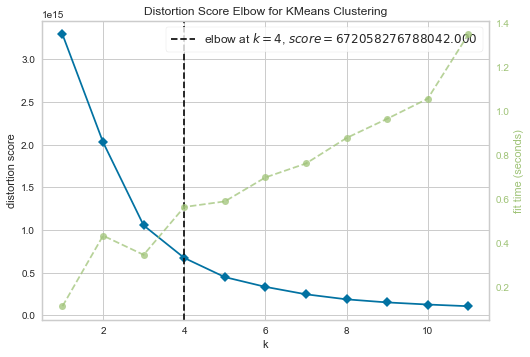

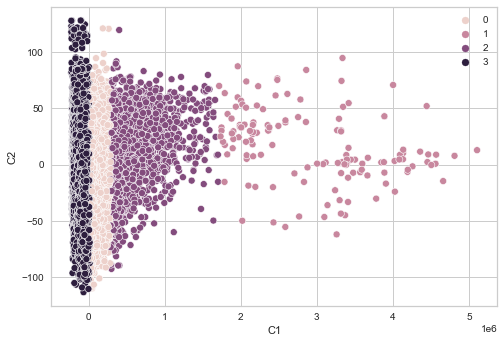

In [7]:
df2 = df.drop(columns=["name", "id", "artists","release_date","popularity"])
df2 = df2.dropna()
pca = PCA(2)
data = pca.fit_transform(df2)
df3 = pd.DataFrame(data, columns = ['C1','C2'])
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df3)
visualizer.show()

kmeans = KMeans(n_clusters=4).fit(df3)
kmeans.labels_ 
sns.scatterplot(data=df3, x="C1", y="C2", hue = kmeans.labels_)
plt.show()